In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv('/Users/Mirko/Desktop/Data_Science/IH_Notebooks/lab-eda-univariate-Mirko/amz_uk_price_prediction_dataset.csv')
df = data.copy()

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
#creating a categorical and numerical value to better work on cat and num columns only
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [5]:
#creating a crosstab between isBestSeller and category

crosstab_result = pd.crosstab(df['isBestSeller'], df['category'])
crosstab_result

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [6]:
#creating a result cross tab variable to start building a bar chart

result = pd.crosstab(df['isBestSeller'], df['category'], normalize='index')
result

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,0.000101,0.001669,0.000101,0.000696,0.000103,0.003457,0.000044,0.000104,0.003826,0.006039,...,0.001499,0.002841,0.000103,0.000076,0.003644,0.000100,0.000096,0.007209,0.000796,0.000101
True,0.000125,0.000251,0.000627,0.000125,0.000376,0.013659,0.000125,0.000627,0.028822,0.042732,...,0.000125,0.003258,0.000000,0.000125,0.003759,0.000877,0.000627,0.026692,0.002506,0.000000


In [7]:
best_seller_result = result.loc[True]  # Select only the best-seller row
best_seller_result = best_seller_result[best_seller_result > 0.02]  # Keep only values > 0.02

AttributeError: module 'matplotlib' has no attribute 'show'

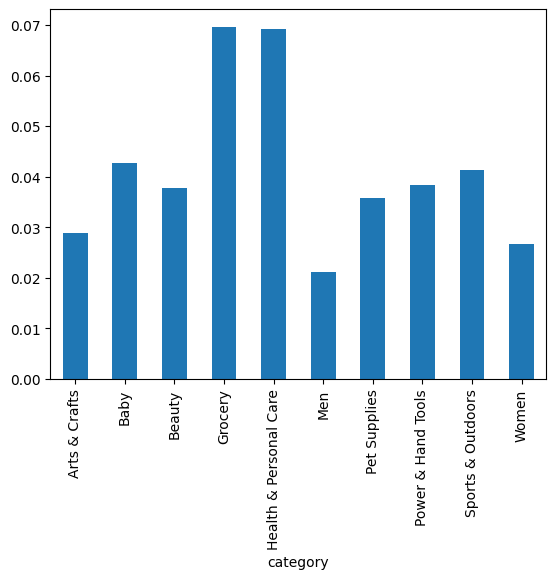

In [8]:
# no stacked
best_seller_result.plot(kind='bar')
plt.show()

During this crosstab analysis I had to refine our parameters multiple times as I wanted to tune pitch the chart results to only show valuable information.

The chart now only contains the proportion of the categories greater than 0.02% which are also best sellers.

Looking at the graph we can confirm that the categories with higher proportions of being best sellers is **Grocery** followed by **Health & Personal care**.
These 2 reach together roughly 0.13% proportion of the best sellers.

In [9]:
#running a chi-square test to determine whether a best seller is dependent on the category

!pip install scipy
import scipy.stats as st
from scipy.stats import chi2_contingency

In [10]:
chi_crosstab = pd.crosstab(df['isBestSeller'], df['category'])

In [11]:
# Chi-square test for isBestSeller and category
_, chi2_pvalue, _, _ = chi2_contingency(chi_crosstab)

In [12]:
chi2_pvalue

np.float64(0.0)

The chi-square test reveals that **there's a strong dependency** between best sellers and categories.

In [13]:
#using Cramer's V test to see how strong the dependency is.

from scipy.stats.contingency import association

association(chi_crosstab, method='cramer')

0.1222829439760564

Although the chi-square test resulted into a 0 (strong dependency) the Cramer's test resulted into 0.12 which shows a weak relationship.
Considering Cramer's test we can assume there must be a stronger relationship in the dataset.

In [14]:
filtered_result = result.loc[:, (result > 0.007).all(axis=0)]
filtered_result

category,Beauty,Hair Care,Luggage and travel gear,Manicure & Pedicure Products,Men,Skin Care,Sports & Outdoors,Women
isBestSeller,,,,,,,,
False,0.007805,0.007663,0.007409,0.007752,0.007081,0.007682,0.343205,0.007209
True,0.037845,0.008772,0.011905,0.007268,0.021178,0.007268,0.041353,0.026692


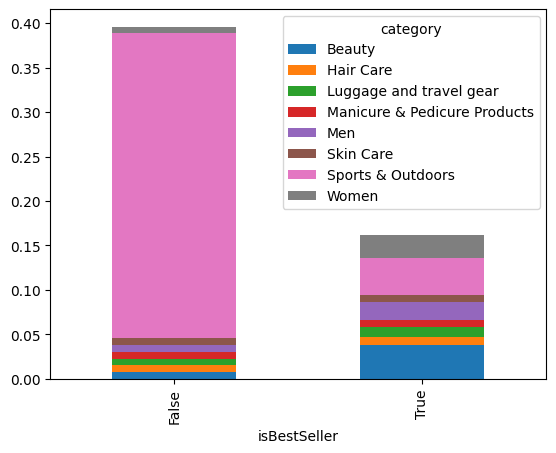

In [15]:
import matplotlib.pyplot as plt
filtered_result.plot(kind='bar', stacked= True)
plt.show()

The above graph shows the market proportion by taking into consideration both best sellers and not.

In [16]:
highest_prices_bestsell = df.sort_values(by='price', ascending= False)
highest_prices_bestsell

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.00,False,0,Sports & Outdoors
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.00,False,0,Desktop PCs
1905315,2136904,B0CJSNFYVM,Abaodam decor christmas ornaments Desk Ornamen...,0.0,0,24674.59,False,0,Garden Storage & Housing
1408966,1551117,B0CHT331TN,BM4445-FI1-01200R10-03-E03 Driver,0.0,0,23482.73,False,0,Scanners & Accessories
319555,340285,B0CHYG6MNW,HEDUSA Halloween 3D Holographic Fan 3D Hologra...,0.0,0,22933.42,False,0,Projectors
...,...,...,...,...,...,...,...,...,...
1025782,1134431,B0BL8LQCHZ,"4 in 1 Bundle Off the Grid Survival Book, Prep...",4.3,5,0.00,False,0,Sports & Outdoors
547321,590132,B005KKRRVK,Kensuke’s Kingdom,4.7,4565,0.00,False,0,PC & Video Games
547507,590332,B09WRXGQZL,"Faith, Hope and Carnage",4.7,546,0.00,False,0,PC & Video Games
1531995,1726672,B07YGP8442,100 Years of Leeds United,4.8,1349,0.00,False,0,Sports & Outdoors


In [17]:
highest_prices_nobest = highest_prices_bestsell.copy()

In [18]:
highest_prices_bestsell = highest_prices_bestsell.loc[(highest_prices_bestsell['isBestSeller']) == True]
highest_prices_nobest = highest_prices_nobest.loc[(highest_prices_nobest['isBestSeller']) == False]

In [19]:
avg_price_bestsell = highest_prices_bestsell['price'].mean()
avg_price_bestsell

np.float64(22.665729323308273)

In [20]:
avg_price_nobest = highest_prices_nobest['price'].mean()
avg_price_nobest

np.float64(89.46193950660854)

Looking into the average prices of the best sellers and not we can already see there's a wide difference.
This suggests that products with higher prices aren't as purchased as the ones with lower price.

We are going to take out the outliers and see how the prices behave once these are taken out.

In [21]:
median_bestsell = highest_prices_bestsell['price'].median()
median_bestsell

np.float64(12.5)

In [22]:
median_nobest = highest_prices_nobest['price'].median()
median_nobest

np.float64(19.15)

In [27]:
highest_prices_bestsell = highest_prices_bestsell.loc[(highest_prices_bestsell['price']) < 23.0]

In [28]:
highest_prices_nobest = highest_prices_nobest.loc[(highest_prices_nobest['price']) < 90.0]

In [30]:
highest_prices_bestsell = highest_prices_bestsell.sort_values(by='price', ascending= False) 

In [34]:
highest_prices_bestsell = highest_prices_bestsell.head(5)

C:\Users\Mirko\AppData\Local\Temp\ipykernel_16324\992775221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=highest_prices_bestsell, x="price", y="category", palette="coolwarm")


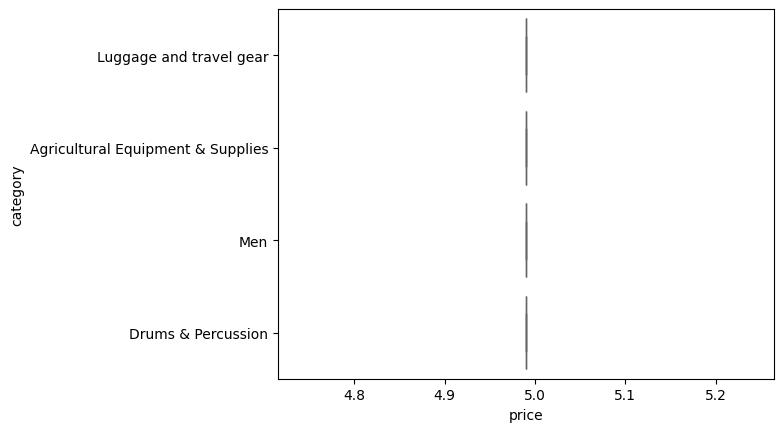

In [35]:
# Plotting a box plot to visualize the spread and outliers of 'price' and 'category', using the "coolwarm" color palette
import seaborn as sns
sns.boxplot(data=highest_prices_bestsell, x="price", y="category", palette="coolwarm")
plt.show()

In [37]:
highest_prices_nobest = highest_prices_nobest.sort_values(by='price', ascending= False)

In [38]:
highest_prices_nobest = highest_prices_nobest.head(5)

C:\Users\Mirko\AppData\Local\Temp\ipykernel_16324\1611763038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=highest_prices_nobest, x="price", y="category", palette="coolwarm")


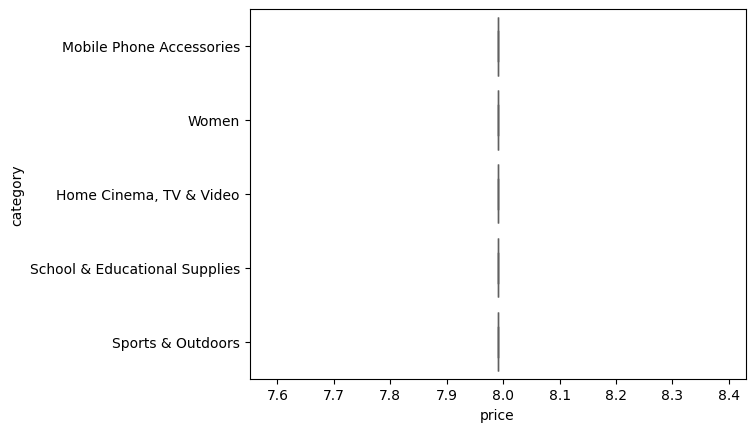

In [39]:
# Plotting a box plot to visualize the spread and outliers of 'price' and 'category', using the "coolwarm" color palette
import seaborn as sns
sns.boxplot(data=highest_prices_nobest, x="price", y="category", palette="coolwarm")
plt.show()